# Directed and Weighted Centrality

Specific measures can be applied to measure centrality or node importance in directed and/or weighted networks.

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.precision", 3)

In this notebook we will use data from the widely-studied Enron email corpus, which is described [here](https://en.wikipedia.org/wiki/Enron_Corpus).

First we load the data and create a network representing the Enron internal email network. Each line contains a sender email addreess, a receipient email address, and the number of emails sent from the sender to the receipient.

It makes sense to represent this data as a directed network, with edge weights indicating the number of emails from sender to receipient.

In [2]:
fin = open("enron.edgelist","r")
lines = fin.readlines()
fin.close()

In [3]:
g = nx.DiGraph()
for line in lines:
    parts = line.strip().split("\t")
    num_emails = int(parts[2])
    g.add_edge( parts[0], parts[1], weight=num_emails )

In [4]:
g.number_of_nodes(), g.number_of_edges()

(147, 2643)

### Unweighted In-Degrees and Out-Degrees

First, we could look at the simple count of incoming edges - i.e. the **unweighted in-degree**. In this context, the number indicates the number of unique individuals from whom a person has received emails.

In [5]:
# get a dictionary of in-degree scores for all nodes
in_degrees = dict(g.in_degree())
in_degrees

{'steven.harris@enron.com': 18,
 'tracy.geaccone@enron.com': 15,
 'kimberly.watson@enron.com': 18,
 'lindy.donoho@enron.com': 16,
 'james.derrick@enron.com': 18,
 'stanley.horton@enron.com': 22,
 'bill.rapp@enron.com': 13,
 'michelle.lokay@enron.com': 17,
 'danny.mccarty@enron.com': 22,
 'teb.lokey@enron.com': 15,
 'drew.fossum@enron.com': 21,
 'susan.scott@enron.com': 37,
 'kevin.hyatt@enron.com': 18,
 'rod.hayslett@enron.com': 23,
 'darrell.schoolcraft@enron.com': 13,
 'jeff.dasovich@enron.com': 20,
 'shelley.corman@enron.com': 23,
 'mike.carson@enron.com': 12,
 'jeff.king@enron.com': 11,
 'kevin.presto@enron.com': 41,
 'doug.gilbert-smith@enron.com': 20,
 'john.zufferli@enron.com': 15,
 'robert.benson@enron.com': 16,
 'fletcher.sturm@enron.com': 34,
 'eric.saibi@enron.com': 7,
 'mike.mcconnell@enron.com': 17,
 'greg.whalley@enron.com': 31,
 'jeffrey.shankman@enron.com': 26,
 'rick.buy@enron.com': 21,
 'steven.kean@enron.com': 29,
 'louise.kitchen@enron.com': 44,
 'harry.arora@enron.

Examine statistics and distribution of unweighted in-degree values:

In [6]:
indeg = pd.Series(in_degrees)
print('In-degree range: [%d, %d]' % (indeg.min(), indeg.max() ) )
print('Mean in-degree: %.2f' % indeg.mean() )
print('Median in-degree: %d' % indeg.median() )

In-degree range: [2, 48]
Mean in-degree: 17.98
Median in-degree: 17


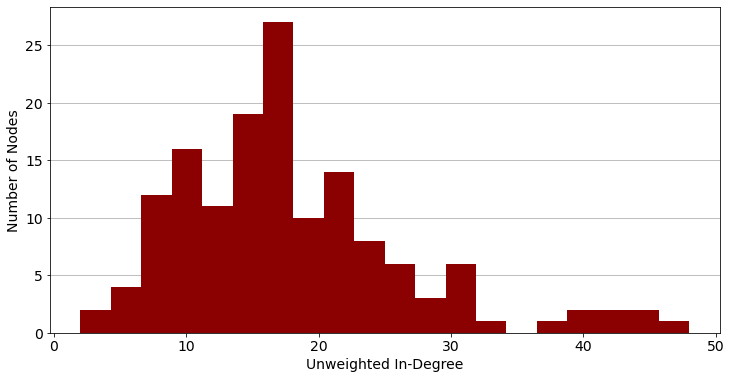

In [7]:
ax = indeg.plot.hist(figsize=(12,6), fontsize=14, legend=None, color="darkred", bins=20, zorder=3)
ax.yaxis.grid()
ax.set_ylabel("Number of Nodes", fontsize=14)
ax.set_xlabel("Unweighted In-Degree", fontsize=14);

Get the top 10 nodes ranked by in-degree. Who received emails from the largest number of unique senders in the company?

In [8]:
indeg.sort_values(ascending=False).head(10)

john.lavorato@enron.com     48
louise.kitchen@enron.com    44
hunter.shively@enron.com    44
phillip.allen@enron.com     43
mike.grigsby@enron.com      42
scott.neal@enron.com        41
kevin.presto@enron.com      41
susan.scott@enron.com       37
fletcher.sturm@enron.com    34
john.arnold@enron.com       31
dtype: int64

Next, look at the simple count of outgoing edges - i.e. the **unweighted out-degree**. This correspond to the number indicates the number of unique individuals to whom each person has sent emails.

In [9]:
# get a dictionary of out-degree scores for all nodes
out_degrees = dict(g.out_degree())

We see that the lowest out-degree is 0 - i.e. these are nodes representing people who sent no emails during the time period covered this dataset.

In [10]:
outdeg = pd.Series(out_degrees)
print('In-degree range: [%d, %d]' % (outdeg.min(), outdeg.max() ) )
print('Mean in-degree: %.2f' % outdeg.mean() )
print('Median in-degree: %d' % outdeg.median() )

In-degree range: [0, 82]
Mean in-degree: 17.98
Median in-degree: 15


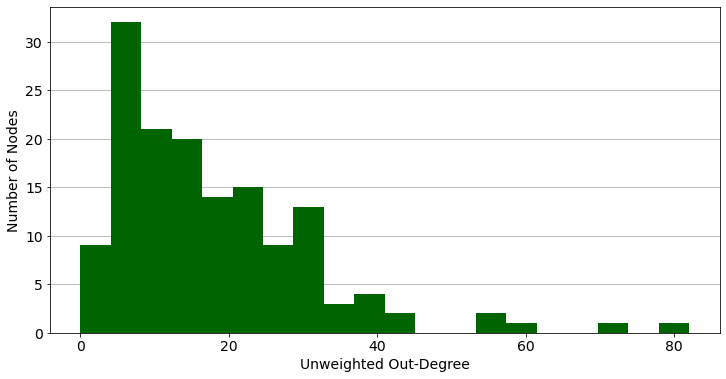

In [11]:
ax = outdeg.plot.hist(figsize=(12,6), fontsize=14, legend=None, color="darkgreen", bins=20, zorder=3)
ax.yaxis.grid()
ax.set_ylabel("Number of Nodes", fontsize=14)
ax.set_xlabel("Unweighted Out-Degree", fontsize=14);

Get the top 10 nodes ranked by in-degree. Who sent emails to the largest number of unique addresses?

In [12]:
outdeg.sort_values(ascending=False).head(10)

john.lavorato@enron.com     82
sally.beck@enron.com        73
louise.kitchen@enron.com    59
susan.scott@enron.com       54
kenneth.lay@enron.com       54
mike.grigsby@enron.com      41
jeff.dasovich@enron.com     41
kam.keiser@enron.com        39
phillip.allen@enron.com     38
david.delainey@enron.com    38
dtype: int64

### Weighted In-Degrees and Out-Degrees

So far we have not considered the number of emails sent between each employee, just the number of edges. We can also look at weighted degrees, which are based on email counts in this case. 

Calculate the weighted in-degree - i.e. the total number of e-mails received by each employee:

In [13]:
# get a dictionary of in-degree scores for all nodes, using values from the 'weight' attribute
win_degrees = dict(g.in_degree(weight="weight"))

We can see from the statistics of these scores that the range of values is much larger when we take into account weights:

In [14]:
windeg = pd.Series(win_degrees)
print('Weighted in-degree range: [%d, %d]' % (windeg.min(), windeg.max() ) )
print('Mean weighted in-degree: %.2f' % windeg.mean() )
print('Median weighted in-degree: %d' % windeg.median() )

Weighted in-degree range: [2, 3704]
Mean weighted in-degree: 432.09
Median weighted in-degree: 187


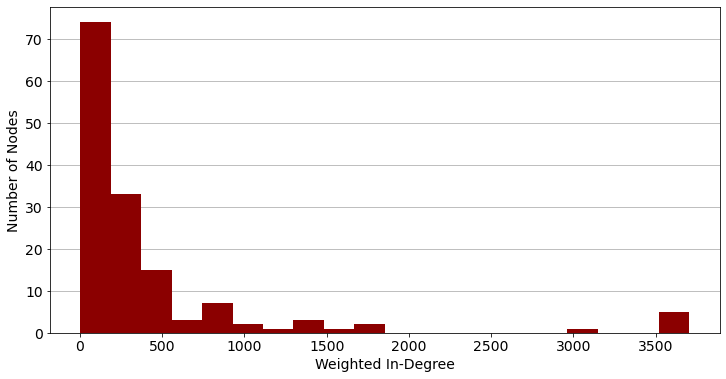

In [15]:
ax = windeg.plot.hist(figsize=(12,6), fontsize=14, legend=None, color="darkred", bins=20, zorder=3)
ax.yaxis.grid()
ax.set_ylabel("Number of Nodes", fontsize=14)
ax.set_xlabel("Weighted In-Degree", fontsize=14);

Which employees received the most emails in the company during this time period?

In [16]:
windeg.sort_values(ascending=False).head(10)

mark.guzman@enron.com        3704
ryan.slinger@enron.com       3691
albert.meyers@enron.com      3688
geir.solberg@enron.com       3685
pete.davis@enron.com         3626
bill.williams@enron.com      2976
james.steffes@enron.com      1782
richard.shapiro@enron.com    1769
mark.taylor@enron.com        1514
vince.kaminski@enron.com     1476
dtype: int64

An analgous measure, **weighted out-degree** is based on the number of edge for a node, but ponderated by the weigtht of each edge. Here this corresponds to the total number of emails sent by each person.

In [17]:
# get a dictionary of weighted out-degree scores for all nodes
wout_degrees = dict(g.out_degree(weight="weight"))

In [18]:
woutdeg = pd.Series(wout_degrees)
print('Weighted in-degree range: [%d, %d]' % (woutdeg.min(), woutdeg.max() ) )
print('Mean weighted in-degree: %.2f' % woutdeg.mean() )
print('Median weighted in-degree: %d' % woutdeg.median() )

Weighted in-degree range: [0, 24367]
Mean weighted in-degree: 432.09
Median weighted in-degree: 93


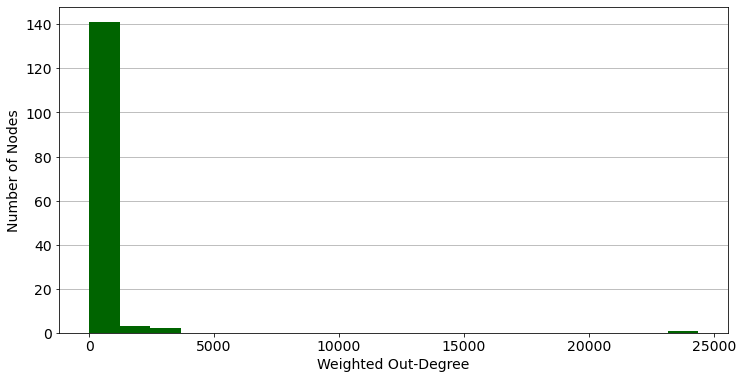

In [19]:
ax = woutdeg.plot.hist(figsize=(12,6), fontsize=14, legend=None, color="darkgreen", bins=20, zorder=3)
ax.yaxis.grid()
ax.set_ylabel("Number of Nodes", fontsize=14)
ax.set_xlabel("Weighted Out-Degree", fontsize=14);

From the distribution plot and the node rankings, we see that one user accounts for 38% of all emails sent:

In [20]:
woutdeg.sort_values(ascending=False).head(10)

pete.davis@enron.com         24367
jeff.dasovich@enron.com       3517
tana.jones@enron.com          2462
vince.kaminski@enron.com      1603
james.steffes@enron.com       1565
sara.shackleton@enron.com     1535
mike.grigsby@enron.com        1163
bill.williams@enron.com       1131
mark.taylor@enron.com          953
louise.kitchen@enron.com       914
dtype: int64

In [21]:
# calculate percentage from this user
100.0 * (woutdeg["pete.davis@enron.com"]/woutdeg.sum())

38.362957948265816

If we remove this individual from the series, we can get a clearer view of the distribution of out-degree scores for the rest of the employees.

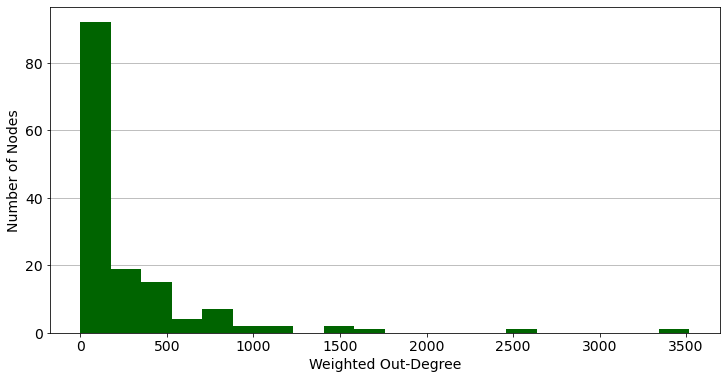

In [22]:
woutdeg2 = woutdeg.drop("pete.davis@enron.com")
ax = woutdeg2.plot.hist(figsize=(12,6), fontsize=14, legend=None, color="darkgreen", bins=20, zorder=3)
ax.yaxis.grid()
ax.set_ylabel("Number of Nodes", fontsize=14)
ax.set_xlabel("Weighted Out-Degree", fontsize=14);

### Weighted Centrality Measures

NetworkX contains implementations of various centrality measures which can take into account edge weights.

For example, we can compute **weighted eigenvector centrality**, which takes into account the strength of connections on edges, by specifying the attribute to use for weights:

In [23]:
w_eigs = dict(nx.eigenvector_centrality(g, weight="weight"))
# convert dictionary to a Series
weig = pd.Series(w_eigs)
# get top 20
weig.sort_values(ascending=False).head(20)

ryan.slinger@enron.com        4.116e-01
albert.meyers@enron.com       4.116e-01
mark.guzman@enron.com         4.113e-01
geir.solberg@enron.com        4.107e-01
pete.davis@enron.com          4.071e-01
bill.williams@enron.com       3.128e-01
eric.linder@enron.com         1.589e-01
monika.causholli@enron.com    1.481e-01
kate.symes@enron.com          8.953e-02
steven.merriss@enron.com      4.900e-02
holden.salisbury@enron.com    4.668e-02
cara.semperger@enron.com      3.425e-03
lisa.gang@enron.com           1.792e-03
john.forney@enron.com         1.367e-03
diana.scholtes@enron.com      1.134e-03
sean.crandall@enron.com       1.008e-03
chris.stokley@enron.com       9.335e-04
kay.mann@enron.com            8.854e-04
matt.motley@enron.com         7.007e-04
phillip.platter@enron.com     7.004e-04
dtype: float64

Similarly, we can calculate **weighted betweeneness centrality**, where shortest paths are computed considering edge weights.

In [24]:
w_bets = dict(nx.betweenness_centrality(g, weight="weight"))
# convert dictionary to a Series
wbet = pd.Series(w_bets)
# get top 20
wbet.sort_values(ascending=False).head(20)

sally.beck@enron.com         0.134
kenneth.lay@enron.com        0.075
kevin.presto@enron.com       0.070
kim.ward@enron.com           0.057
jeff.dasovich@enron.com      0.051
phillip.allen@enron.com      0.051
chris.stokley@enron.com      0.049
fletcher.sturm@enron.com     0.047
john.lavorato@enron.com      0.046
hunter.shively@enron.com     0.045
scott.neal@enron.com         0.043
louise.kitchen@enron.com     0.038
greg.whalley@enron.com       0.035
richard.sanders@enron.com    0.032
barry.tycholiz@enron.com     0.030
phillip.platter@enron.com    0.030
susan.scott@enron.com        0.030
bill.williams@enron.com      0.030
darron.giron@enron.com       0.030
tana.jones@enron.com         0.029
dtype: float64